In [ ]:
!pip install naiveautoml

# Minimal Example: Applying Naive AutoML to iris

In [2]:
from sklearn.datasets import fetch_openml
import sklearn.datasets
import naiveautoml

X, y = fetch_openml(data_id=61, return_X_y=True)  # iris
naml = naiveautoml.NaiveAutoML(show_progress = True, max_hpo_iterations=10)
naml.fit(X, y)

Progress for algorithm selection:


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:02<00:00, 11.46it/s]


Progress for hyperparameter optimization:


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.73it/s]


In [3]:
naml.chosen_model

Pipeline(steps=[('data-pre-processor', MinMaxScaler()),
                ('learner', LinearDiscriminantAnalysis())])

In [4]:
naml.leaderboard

,order,time,runtime,pipeline,default_hp,neg_log_loss,new_best,evaluation_report,status,exception,data-pre-processor_class,data-pre-processor_hps,feature-pre-processor_class,feature-pre-processor_hps,learner_class,learner_hps
0,15,1.716840e+09,0.038556,"(MinMaxScaler(), LinearDiscriminantAnalysis())",True,-0.0256,True,"{'neg_log_loss': [-0.002495394501050993, -0.02...",ok,None,sklearn.preprocessing._data.MinMaxScaler,None,None,None,sklearn.discriminant_analysis.LinearDiscrimina...,None
1,22,1.716840e+09,0.076023,"(MinMaxScaler(), FastICA(), LinearDiscriminant...",True,-0.0290,False,"{'neg_log_loss': [-0.021755102475042885, -0.08...",ok,None,sklearn.preprocessing._data.MinMaxScaler,None,sklearn.decomposition._fastica.FastICA,None,sklearn.discriminant_analysis.LinearDiscrimina...,None
2,20,1.716840e+09,0.037481,"(StandardScaler(), LinearDiscriminantAnalysis())",True,-0.0320,False,"{'neg_log_loss': [-0.06935021251033252, -0.026...",ok,None,sklearn.preprocessing._data.StandardScaler,None,None,None,sklearn.discriminant_analysis.LinearDiscrimina...,None
3,17,1.716840e+09,0.073377,"(PowerTransformer(), LinearDiscriminantAnalysi...",True,-0.0403,False,"{'neg_log_loss': [-0.019349148853344624, -0.07...",ok,None,sklearn.preprocessing._data.PowerTransformer,None,None,None,sklearn.discriminant_analysis.LinearDiscrimina...,None
4,35,1.716840e+09,0.048369,"(MinMaxScaler(), LinearDiscriminantAnalysis(sh...",False,-0.0471,True,"{'neg_log_loss': [-0.04895887982577556, -0.079...",ok,None,sklearn.preprocessing._data.MinMaxScaler,None,None,None,sklearn.discriminant_analysis.LinearDiscrimina...,"{'shrinkage': 'auto', 'tol': 1.917751462463796..."
5,40,1.716840e+09,0.037374,"(MinMaxScaler(), LinearDiscriminantAnalysis(so...",False,-0.0499,True,"{'neg_log_loss': [-0.018734488484043823, -0.08...",ok,None,sklearn.preprocessing._data.MinMaxScaler,None,None,None,sklearn.discriminant_analysis.LinearDiscrimina...,"{'shrinkage': 'None', 'tol': 0.0871508939358007}"
6,38,1.716840e+09,0.034237,"(MinMaxScaler(), LinearDiscriminantAnalysis(so...",False,-0.0503,True,"{'neg_log_loss': [-0.0765949969130555, -0.0462...",ok,None,sklearn.preprocessing._data.MinMaxScaler,None,None,None,sklearn.discriminant_analysis.LinearDiscrimina...,"{'shrinkage': 'None', 'tol': 0.000159870783723..."
7,33,1.716840e+09,0.036004,"(MinMaxScaler(), LinearDiscriminantAnalysis(so...",False,-0.0510,True,"{'neg_log_loss': [-0.13321562481779245, -0.010...",ok,None,sklearn.preprocessing._data.MinMaxScaler,None,None,None,sklearn.discriminant_analysis.LinearDiscrimina...,"{'shrinkage': 'None', 'tol': 0.000478226112929..."
8,31,1.716840e+09,0.048536,"(MinMaxScaler(), LinearDiscriminantAnalysis(so...",False,-0.0512,True,"{'neg_log_loss': [-0.07254237857271588, -0.027...",ok,None,sklearn.preprocessing._data.MinMaxScaler,None,None,None,sklearn.discriminant_analysis.LinearDiscrimina...,"{'shrinkage': 'None', 'tol': 1.735826848763034..."
9,18,1.716840e+09,0.040574,"(QuantileTransformer(), LinearDiscriminantAnal...",True,-0.0556,False,"{'neg_log_loss': [-0.11018273067707582, -0.008...",ok,None,sklearn.preprocessing._data.QuantileTransformer,None,None,None,sklearn.discriminant_analysis.LinearDiscrimina...,None


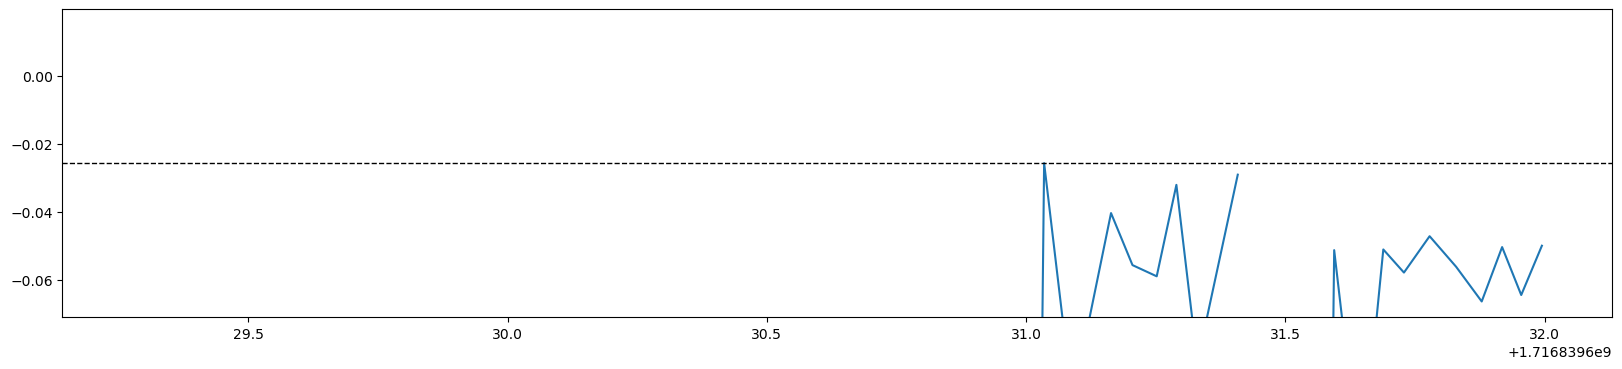

In [5]:
import matplotlib.pyplot as plt

def plot_history(naml):
    scoring = naml.task.scoring["name"]
    
    fig, ax = plt.subplots(figsize=(20, 4))
    ax.plot(naml.history["time"], naml.history[scoring])
    ax.axhline(naml.history[scoring].max(), linestyle="--", color="black", linewidth=1)
    max_val = naml.history[scoring].max()
    median_val = naml.history[scoring].median()
    ax.set_ylim([median_val, max_val + (max_val - median_val)])
    plt.show()

plot_history(naml)

## Apply Naive AutoML to the eucalyptus dataset (with categoricals and missing values)

In [6]:
X, y = fetch_openml(data_id=188, return_X_y=True)
print(f"Num of missing values: {X.isna().sum().sum()}")
X

Num of missing values: 448


,Abbrev,Rep,Locality,Map_Ref,Latitude,Altitude,Rainfall,Frosts,Year,Sp,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm
0,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100,850,-2,1980,co,1520.0,18.45,9.96,40.0,4.0,3.0,3.5,4.0,3.5
1,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100,850,-2,1980,fr,1487.0,13.15,9.65,90.0,4.5,4.0,3.5,3.5,3.0
2,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100,850,-2,1980,ma,1362.0,10.32,6.50,50.0,2.3,2.5,3.0,3.5,3.0
3,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100,850,-2,1980,nd,1596.0,14.80,9.48,70.0,3.7,3.0,3.3,4.0,3.5
4,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100,850,-2,1980,ni,2088.0,14.50,10.78,90.0,4.0,2.7,3.3,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,WSh,1,Southern_Hawkes_Bay,N151_922/226,40__36,100,1250,-2,1983,fa,2548.0,41.63,12.64,28.0,4.2,3.2,2.3,1.9,1.7
732,WSh,1,Southern_Hawkes_Bay,N151_922/226,40__36,100,1250,-2,1983,fr,2552.0,33.35,10.61,33.0,4.5,4.0,2.8,3.0,1.5
733,WSh,1,Southern_Hawkes_Bay,N151_922/226,40__36,100,1250,-2,1983,ni,2568.0,28.21,9.47,94.0,4.6,3.0,2.0,1.8,1.2
734,WSh,1,Southern_Hawkes_Bay,N151_922/226,40__36,100,1250,-2,1983,ob,1522.0,27.36,11.49,67.0,4.7,3.3,3.4,3.4,3.0


In [7]:
naml = naiveautoml.NaiveAutoML(show_progress=True, max_hpo_iterations=10)
naml.fit(X, y)

Progress for algorithm selection:


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:15<00:00,  2.04it/s]


Progress for hyperparameter optimization:


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.35s/it]


In [8]:
print(naml.chosen_model)

Pipeline(steps=[('impute_and_binarize',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Rep', 'Altitude',
                                                   'Rainfall', 'Frosts', 'Year',
                                                   'PMCno', 'DBH', 'Ht', 'Surv',
                                                   'Vig', 'Ins_res', 'Stem_Fm',
                                                   'Crown_Fm', 'Brnch_Fm']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('binarizer',
        

In [9]:
naml.leaderboard

,order,time,runtime,pipeline,default_hp,neg_log_loss,new_best,evaluation_report,status,exception,data-pre-processor_class,data-pre-processor_hps,feature-pre-processor_class,feature-pre-processor_hps,learner_class,learner_hps
0,28,1.716840e+09,2.947976,"(ColumnTransformer(transformers=[('num',\n ...",True,-0.7442,True,"{'neg_log_loss': [-0.7438252244500024, -0.8369...",ok,None,sklearn.feature_selection._variance_threshold....,None,sklearn.preprocessing._polynomial.PolynomialFe...,None,sklearn.ensemble._forest.RandomForestClassifier,None
1,21,1.716840e+09,1.659287,"(ColumnTransformer(transformers=[('num',\n ...",True,-0.7972,True,"{'neg_log_loss': [-0.8040130707520944, -0.8367...",ok,None,sklearn.feature_selection._variance_threshold....,None,None,None,sklearn.ensemble._forest.RandomForestClassifier,None
2,1,1.716840e+09,1.398526,"(ColumnTransformer(transformers=[('num',\n ...",True,-0.8218,True,"{'neg_log_loss': [-0.7985448420232011, -0.8385...",ok,None,None,None,None,None,sklearn.ensemble._forest.RandomForestClassifier,None
3,16,1.716840e+09,1.897339,"(ColumnTransformer(transformers=[('num',\n ...",True,-0.8747,False,"{'neg_log_loss': [-0.890343561760756, -0.92738...",ok,None,sklearn.preprocessing._data.Normalizer,None,None,None,sklearn.ensemble._forest.RandomForestClassifier,None
4,0,1.716840e+09,1.420007,"(ColumnTransformer(transformers=[('num',\n ...",True,-0.8969,True,"{'neg_log_loss': [-0.9249840584167478, -0.8883...",ok,None,None,None,None,None,sklearn.ensemble._forest.ExtraTreesClassifier,None
5,29,1.716840e+09,1.536983,"(ColumnTransformer(transformers=[('num',\n ...",True,-1.1550,False,"{'neg_log_loss': [-1.1235866063406887, -1.1675...",ok,None,sklearn.feature_selection._variance_threshold....,None,sklearn.feature_selection._univariate_selectio...,None,sklearn.ensemble._forest.RandomForestClassifier,None
6,32,1.716840e+09,4.452793,"(ColumnTransformer(transformers=[('num',\n ...",False,-1.1597,True,"{'neg_log_loss': [-1.1651899439196283, -1.1581...",ok,None,sklearn.feature_selection._variance_threshold....,None,sklearn.preprocessing._polynomial.PolynomialFe...,"{'degree': 2, 'include_bias': 'True', 'interac...",sklearn.ensemble._forest.RandomForestClassifier,"{'bootstrap': 'False', 'criterion': 'entropy',..."
7,37,1.716840e+09,3.501099,"(ColumnTransformer(transformers=[('num',\n ...",False,-1.2859,True,"{'neg_log_loss': [-1.2933575482942903, -1.2889...",ok,None,sklearn.feature_selection._variance_threshold....,None,sklearn.preprocessing._polynomial.PolynomialFe...,"{'degree': 2, 'include_bias': 'False', 'intera...",sklearn.ensemble._forest.RandomForestClassifier,"{'bootstrap': 'False', 'criterion': 'gini', 'm..."
8,38,1.716840e+09,4.022135,"(ColumnTransformer(transformers=[('num',\n ...",False,-1.2873,True,"{'neg_log_loss': [-1.3000910389764708, -1.2896...",ok,None,sklearn.feature_selection._variance_threshold....,None,sklearn.preprocessing._polynomial.PolynomialFe...,"{'degree': 2, 'include_bias': 'False', 'intera...",sklearn.ensemble._forest.RandomForestClassifier,"{'bootstrap': 'True', 'criterion': 'gini', 'ma..."
9,35,1.716840e+09,6.834368,"(ColumnTransformer(transformers=[('num',\n ...",False,-1.2885,True,"{'neg_log_loss': [-1.2962518843477562, -1.2758...",ok,None,sklearn.feature_selection._variance_threshold....,None,sklearn.preprocessing._polynomial.PolynomialFe...,"{'degree': 3, 'include_bias': 'True', 'interac...",sklearn.ensemble._forest.RandomForestClassifier,"{'bootstrap': 'True', 'criterion': 'gini', 'ma..."


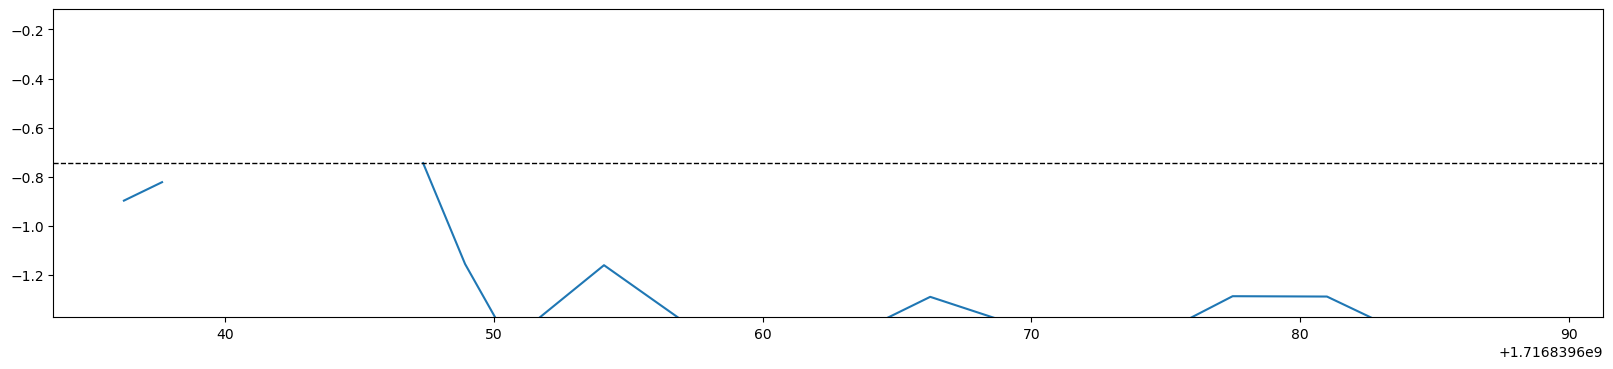

In [10]:
plot_history(naml)

# Apply Naive AutoML to breast cancer with logging enabled

In [11]:
# configure logger
import logging
logger = logging.getLogger('naiveautoml')
logger.setLevel(logging.INFO)
ch = logging.StreamHandler()
ch.setLevel(logging.INFO)
formatter = logging.Formatter(
    '%(asctime)s - %(name)s - %(levelname)s - %(message)s')
ch.setFormatter(formatter)
logger.addHandler(ch)

logger = logging.getLogger('naiveautoml.evalpool')
logger.setLevel(logging.WARN)
ch = logging.StreamHandler()
ch.setLevel(logging.WARN)
formatter = logging.Formatter(
    '%(asctime)s - %(name)s - %(levelname)s - %(message)s')
ch.setFormatter(formatter)
logger.addHandler(ch)

In [12]:
%%time
X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
print(X_train.shape)
print(X_test.shape)

naml = naiveautoml.NaiveAutoML(
    show_progress=True,
    timeout_overall=30,
    max_hpo_iterations=1000
)
naml.fit(X_train, y_train)

2024-05-27 21:54:55,084 - naiveautoml - INFO - Automatically inferred task type: classification
2024-05-27 21:54:55,121 - naiveautoml - INFO - There are 0 categorical features, which will be binarized.
2024-05-27 21:54:55,122 - naiveautoml - INFO - Missing values for the different attributes are [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0].
2024-05-27 21:54:55,122 - naiveautoml - INFO - Optimizing pipeline under the following conditions.
                
        Input type: <class 'numpy.ndarray'> (sparse: False)
    Input shape: (426, 30)
    Target type: <class 'numpy.ndarray'> (sparse: False)
    Target shape: (426,).
    Scoring: {'name': 'roc_auc', 'fun': make_scorer(roc_auc_score, response_method=('decision_function', 'predict_proba'))}
    Other scorings computed: []
    Timeout Overall: 30
    Timeout per Candidate: 300
    Max HPO iterations: 1000
    Max HPO iterations w/o improvement: 100
    Max HPO time (s) w/o improvement: 1800
    
data-pre-processor
	sk

(569, 30)
(569,)
(426, 30)
(143, 30)
Progress for algorithm selection:


  0%|                                                                                                                                                                  | 0/31 [00:00<?, ?it/s]2024-05-27 21:54:55,128 - naiveautoml - INFO - --------------------------------------------------
2024-05-27 21:54:55,128 - naiveautoml - INFO - Selecting component for step with name: learner
2024-05-27 21:54:55,129 - naiveautoml - INFO - --------------------------------------------------
2024-05-27 21:54:55,129 - naiveautoml - INFO - Evaluating sklearn.ensemble._forest.ExtraTreesClassifier.Timeout: 300. Remaining time: 19.95403504371643
2024-05-27 21:54:55,715 - naiveautoml - INFO - Observed score of 0.9915 for default configuration of sklearn.ensemble._forest.ExtraTreesClassifier
  3%|████▉                                                                                                                                                     | 1/31 [00:00<00:17,  1.70it/s]2024-05-27 21:54:55,718 - naiv

2024-05-27 21:55:04,204 - naiveautoml - INFO - Preventing evaluation of forbidden pipeline Pipeline(steps=[('data-pre-processor', QuantileTransformer()),
                ('learner', HistGradientBoostingClassifier())])
2024-05-27 21:55:04,210 - naiveautoml - INFO - Observed score of nan for default configuration of sklearn.preprocessing._data.QuantileTransformer
2024-05-27 21:55:04,212 - naiveautoml - INFO - Evaluating sklearn.preprocessing._data.RobustScaler.Timeout: 300. Remaining time: 10.871854543685913
2024-05-27 21:55:04,217 - naiveautoml - INFO - Preventing evaluation of forbidden pipeline Pipeline(steps=[('data-pre-processor', RobustScaler()),
                ('learner', HistGradientBoostingClassifier())])
2024-05-27 21:55:04,225 - naiveautoml - INFO - Observed score of nan for default configuration of sklearn.preprocessing._data.RobustScaler
2024-05-27 21:55:04,227 - naiveautoml - INFO - Evaluating sklearn.preprocessing._data.StandardScaler.Timeout: 300. Remaining time: 10.8565

Progress for hyperparameter optimization:


  0%|                                                                                                                                                                | 0/1000 [00:00<?, ?it/s]2024-05-27 21:55:09,117 - naiveautoml - INFO - --------------------------------------------------
2024-05-27 21:55:09,118 - naiveautoml - INFO - Entering HPO phase.Remaining time: 15.97s
2024-05-27 21:55:09,119 - naiveautoml - INFO - --------------------------------------------------
2024-05-27 21:55:09,120 - naiveautoml - INFO - Starting 1-th HPO step. Currently best known score is -inf
2024-05-27 21:55:09,411 - naiveautoml - INFO - Observed score of 0.9903 for params Configuration(values={
  'learner:early_stop': 'valid',
  'learner:l2_regularization': 0.21150947618625615,
  'learner:learning_rate': 0.11034889686708521,
  'learner:loss': 'log_loss',
  'learner:max_bins': 255,
  'learner:max_depth': 'None',
  'learner:max_leaf_nodes': 4,
  'learner:min_samples_leaf': 45,
  'learner:n_iter_no_change

  1%|█▌                                                                                                                                                     | 10/1000 [00:17<32:13,  1.95s/it]2024-05-27 21:55:26,260 - naiveautoml - INFO - Next iteration would probably take more time than the deadline allows. Stopping HPO.
2024-05-27 21:55:26,264 - naiveautoml - INFO - --------------------------------------------------
2024-05-27 21:55:26,264 - naiveautoml - INFO - Search Completed. Building final pipeline.
2024-05-27 21:55:26,265 - naiveautoml - INFO - --------------------------------------------------
2024-05-27 21:55:26,267 - naiveautoml - INFO - Pipeline(steps=[('learner', HistGradientBoostingClassifier())])
2024-05-27 21:55:26,270 - naiveautoml - INFO - Now fitting the pipeline with all given data.
2024-05-27 21:55:26,558 - naiveautoml - INFO - Runtime was 31.47462773323059 seconds


CPU times: user 1min 43s, sys: 1.48 s, total: 1min 45s
Wall time: 31.5 s


In [13]:
naml.history

,time,runtime,pipeline,default_hp,roc_auc,new_best,evaluation_report,status,exception,data-pre-processor_class,data-pre-processor_hps,feature-pre-processor_class,feature-pre-processor_hps,learner_class,learner_hps
0,1.716840e+09,0.582555,(ExtraTreesClassifier()),True,0.9915,True,"{'roc_auc': [1.0, 0.9814179531160664, 0.997141...",ok,None,None,None,None,None,sklearn.ensemble._forest.ExtraTreesClassifier,None
1,1.716840e+09,1.153195,(RandomForestClassifier()),True,0.9961,True,"{'roc_auc': [0.9902801600914808, 1.0, 0.995997...",ok,None,None,None,None,None,sklearn.ensemble._forest.RandomForestClassifier,None
2,1.716840e+09,1.270579,(HistGradientBoostingClassifier()),True,0.9969,True,"{'roc_auc': [0.9988564894225272, 1.0, 0.993710...",ok,None,None,None,None,None,sklearn.ensemble.HistGradientBoostingClassifier,None
3,1.716840e+09,0.036881,(BernoulliNB()),True,0.5132,False,"{'roc_auc': [0.5188679245283019, 0.50943396226...",ok,None,None,None,None,None,sklearn.naive_bayes.BernoulliNB,None
4,1.716840e+09,0.060323,(DecisionTreeClassifier()),True,0.9013,False,"{'roc_auc': [0.9545454545454545, 0.88650657518...",ok,None,None,None,None,None,sklearn.tree._classes.DecisionTreeClassifier,None
5,1.716840e+09,0.032205,(GaussianNB()),True,0.9903,False,"{'roc_auc': [0.9914236706689536, 0.99828473413...",ok,None,None,None,None,None,sklearn.naive_bayes.GaussianNB,None
6,1.716840e+09,0.044195,(KNeighborsClassifier()),True,0.9678,False,"{'roc_auc': [0.9751286449399656, 0.98284734133...",ok,None,None,None,None,None,sklearn.neighbors._classification.KNeighborsCl...,None
7,1.716840e+09,0.043597,(LinearDiscriminantAnalysis()),True,0.9914,False,"{'roc_auc': [0.9857061177815895, 0.99599771297...",ok,None,None,None,None,None,sklearn.discriminant_analysis.LinearDiscrimina...,None
8,1.716840e+09,0.032398,(QuadraticDiscriminantAnalysis()),True,0.9863,False,"{'roc_auc': [0.9965694682675814, 0.98399085191...",ok,None,None,None,None,None,sklearn.discriminant_analysis.QuadraticDiscrim...,None
9,1.716840e+09,3.127650,(SVC(kernel='linear')),True,0.9868,False,"{'roc_auc': [0.9977129788450544, 0.97255574614...",ok,None,None,None,None,None,sklearn.svm._classes.SVC,None


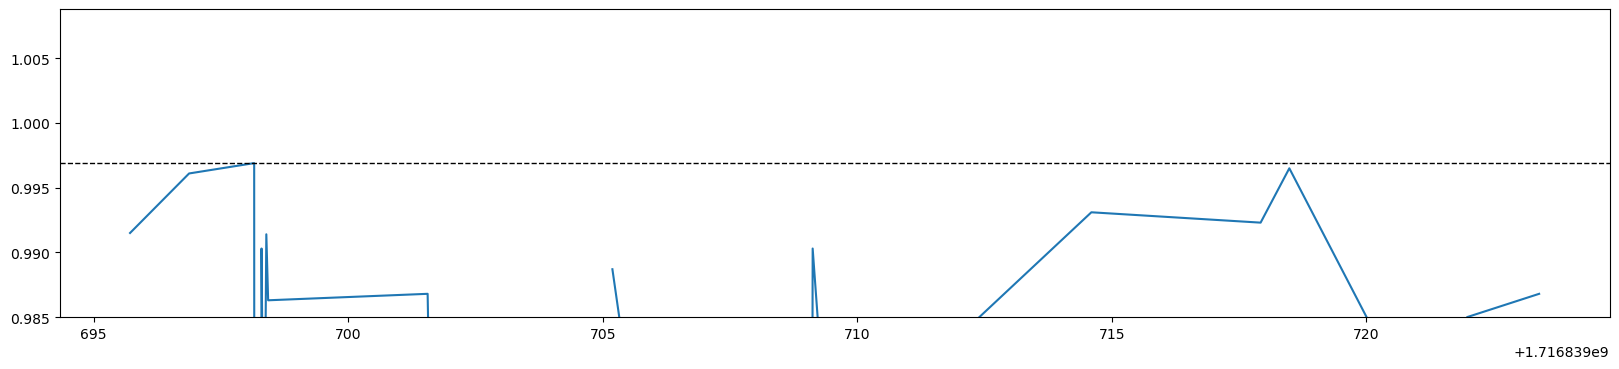

In [14]:
plot_history(naml)